In [ ]:
!nvidia-smi

Thu Dec  5 17:30:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

fatal: destination path 'yolov9' already exists and is not an empty directory.
/content/yolov9


In [ ]:
!pip install -q roboflow

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 804884
drwxr-xr-x 2 root root      4096 Dec  5 17:30 .
drwxr-xr-x 1 root root      4096 Dec  5 16:59 ..
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18  2024 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18  2024 gelan-e.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18  2024 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18  2024 yolov9-e.pt.1


In [ ]:
import roboflow
roboflow.login()

You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YStY4qFjV3tfpnhQcViO")
project = rf.workspace("joseph-nelson").project("plantdoc")
version = project.version(2)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PlantDoc-2 in yolov9:: 100%|██████████| 5147/5147 [00:00<00:00, 8205.82it/s]


In [ ]:
!ls /content/yolov9

benchmarks.py  export.py   MyProject-1	README.md	  segment	   utils
classify       figure	   panoptic	requirements.txt  train_dual.py    val_dual.py
data	       hubconf.py  PlantDoc-2	runs		  train.py	   val.py
detect.py      models	   __pycache__	scripts		  train_triple.py  val_triple.py


In [ ]:
!ls -R PlantDoc-2

Streaming output truncated to the last 5000 lines.
 ill-tomato-of-tomato-mosaic-virus-DBE17N_jpg.rf.04e257236c57f63e276d261ce9d27d5b.jpg
 image_jpg.rf.d0c1916433b523c995c43dda5b71042c.jpg
 IMG_1246_jpg.rf.1b23e74f670b24e1bdffc217738b8f40.jpg
'IMG_1629_JPG?1507122477_jpg.rf.fef67d5a7677d5ca8227029ff8d80a0f.jpg'
 IMG_42231_jpg.rf.a13fc6cac1d8e9e404bc2b33520d4831.jpg
 IMG_5808_jpg.rf.fc074a1880cda6eaeef9981c04280647.jpg
 irish-blight-symptoms-on-potato-leaves-atmf8b_jpg.rf.43f1da91246b3cc66cb7120dc62c756b.jpg
 iron-deficiency-raspberry-leaf-chlorosis-isolated-32457798_jpg.rf.b142223fbbe6a9912a5f69baabe911a1.jpg
 LateBlight04_jpg.rf.0fdda151b26e776e4836d735e049975f.jpg
 late_blight_tomato_leaf_spore1x1200_jpg.rf.be4f787fa793160d344f1b8589fdbc86.jpg
 LateBlt09_06_jpg.rf.ffe9b2013108fbf8c71e8ffe392680e5.jpg
'latest?cb=20100621160325_jpg.rf.c11efb983a1bb42fad21990a035f9833.jpg'
 leaf-blueberry-15281271_jpg.rf.ddd95e577fab5e6ef659a71e582db1c2.jpg
 leaf-raspberry-isolated-on-a-white-stock-photo

In [ ]:
!cat PlantDoc-2/data.yaml

names:
- Car
- Cone
- Person
nc: 3
roboflow:
  license: CC BY 4.0
  project: PlantDoc-2-cf9d2
  url: https://universe.roboflow.com/project-1pzor/PlantDoc-2-cf9d2/dataset/1
  version: 1
  workspace: project-1pzor
train: PlantDoc-2-1/train/images
val: PlantDoc-2-1/valid/images
test: PlantDoc-2-1/test/images


In [ ]:
%%writefile PlantDoc-2/data.yaml
names:
- Car
- Cone
- Person
nc: 3
roboflow:
  license: CC BY 4.0
  project: myproject-cf9d2
  url: https://universe.roboflow.com/joseph-nelson/plantdoc/dataset/1
  version: 2
  workspace: joseph-nelson
train: PlantDoc-2/train/images
val: PlantDoc-2/valid/images
test: PlantDoc-2/test/images


Overwriting PlantDoc-2/data.yaml


In [ ]:
!ls /content/yolov9/models

common.py  experimental.py  __init__.py  __pycache__  tf.py
detect	   hub		    panoptic	 segment      yolo.py


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-12-05 17:45:51.963860: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 17:45:51.984109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 17:45:51.990030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 17:45:52.003836: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 17:45:53.190300: W

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

events.out.tfevents.1733418135.78011830c647.2553.0  hyp.yaml  opt.yaml	weights


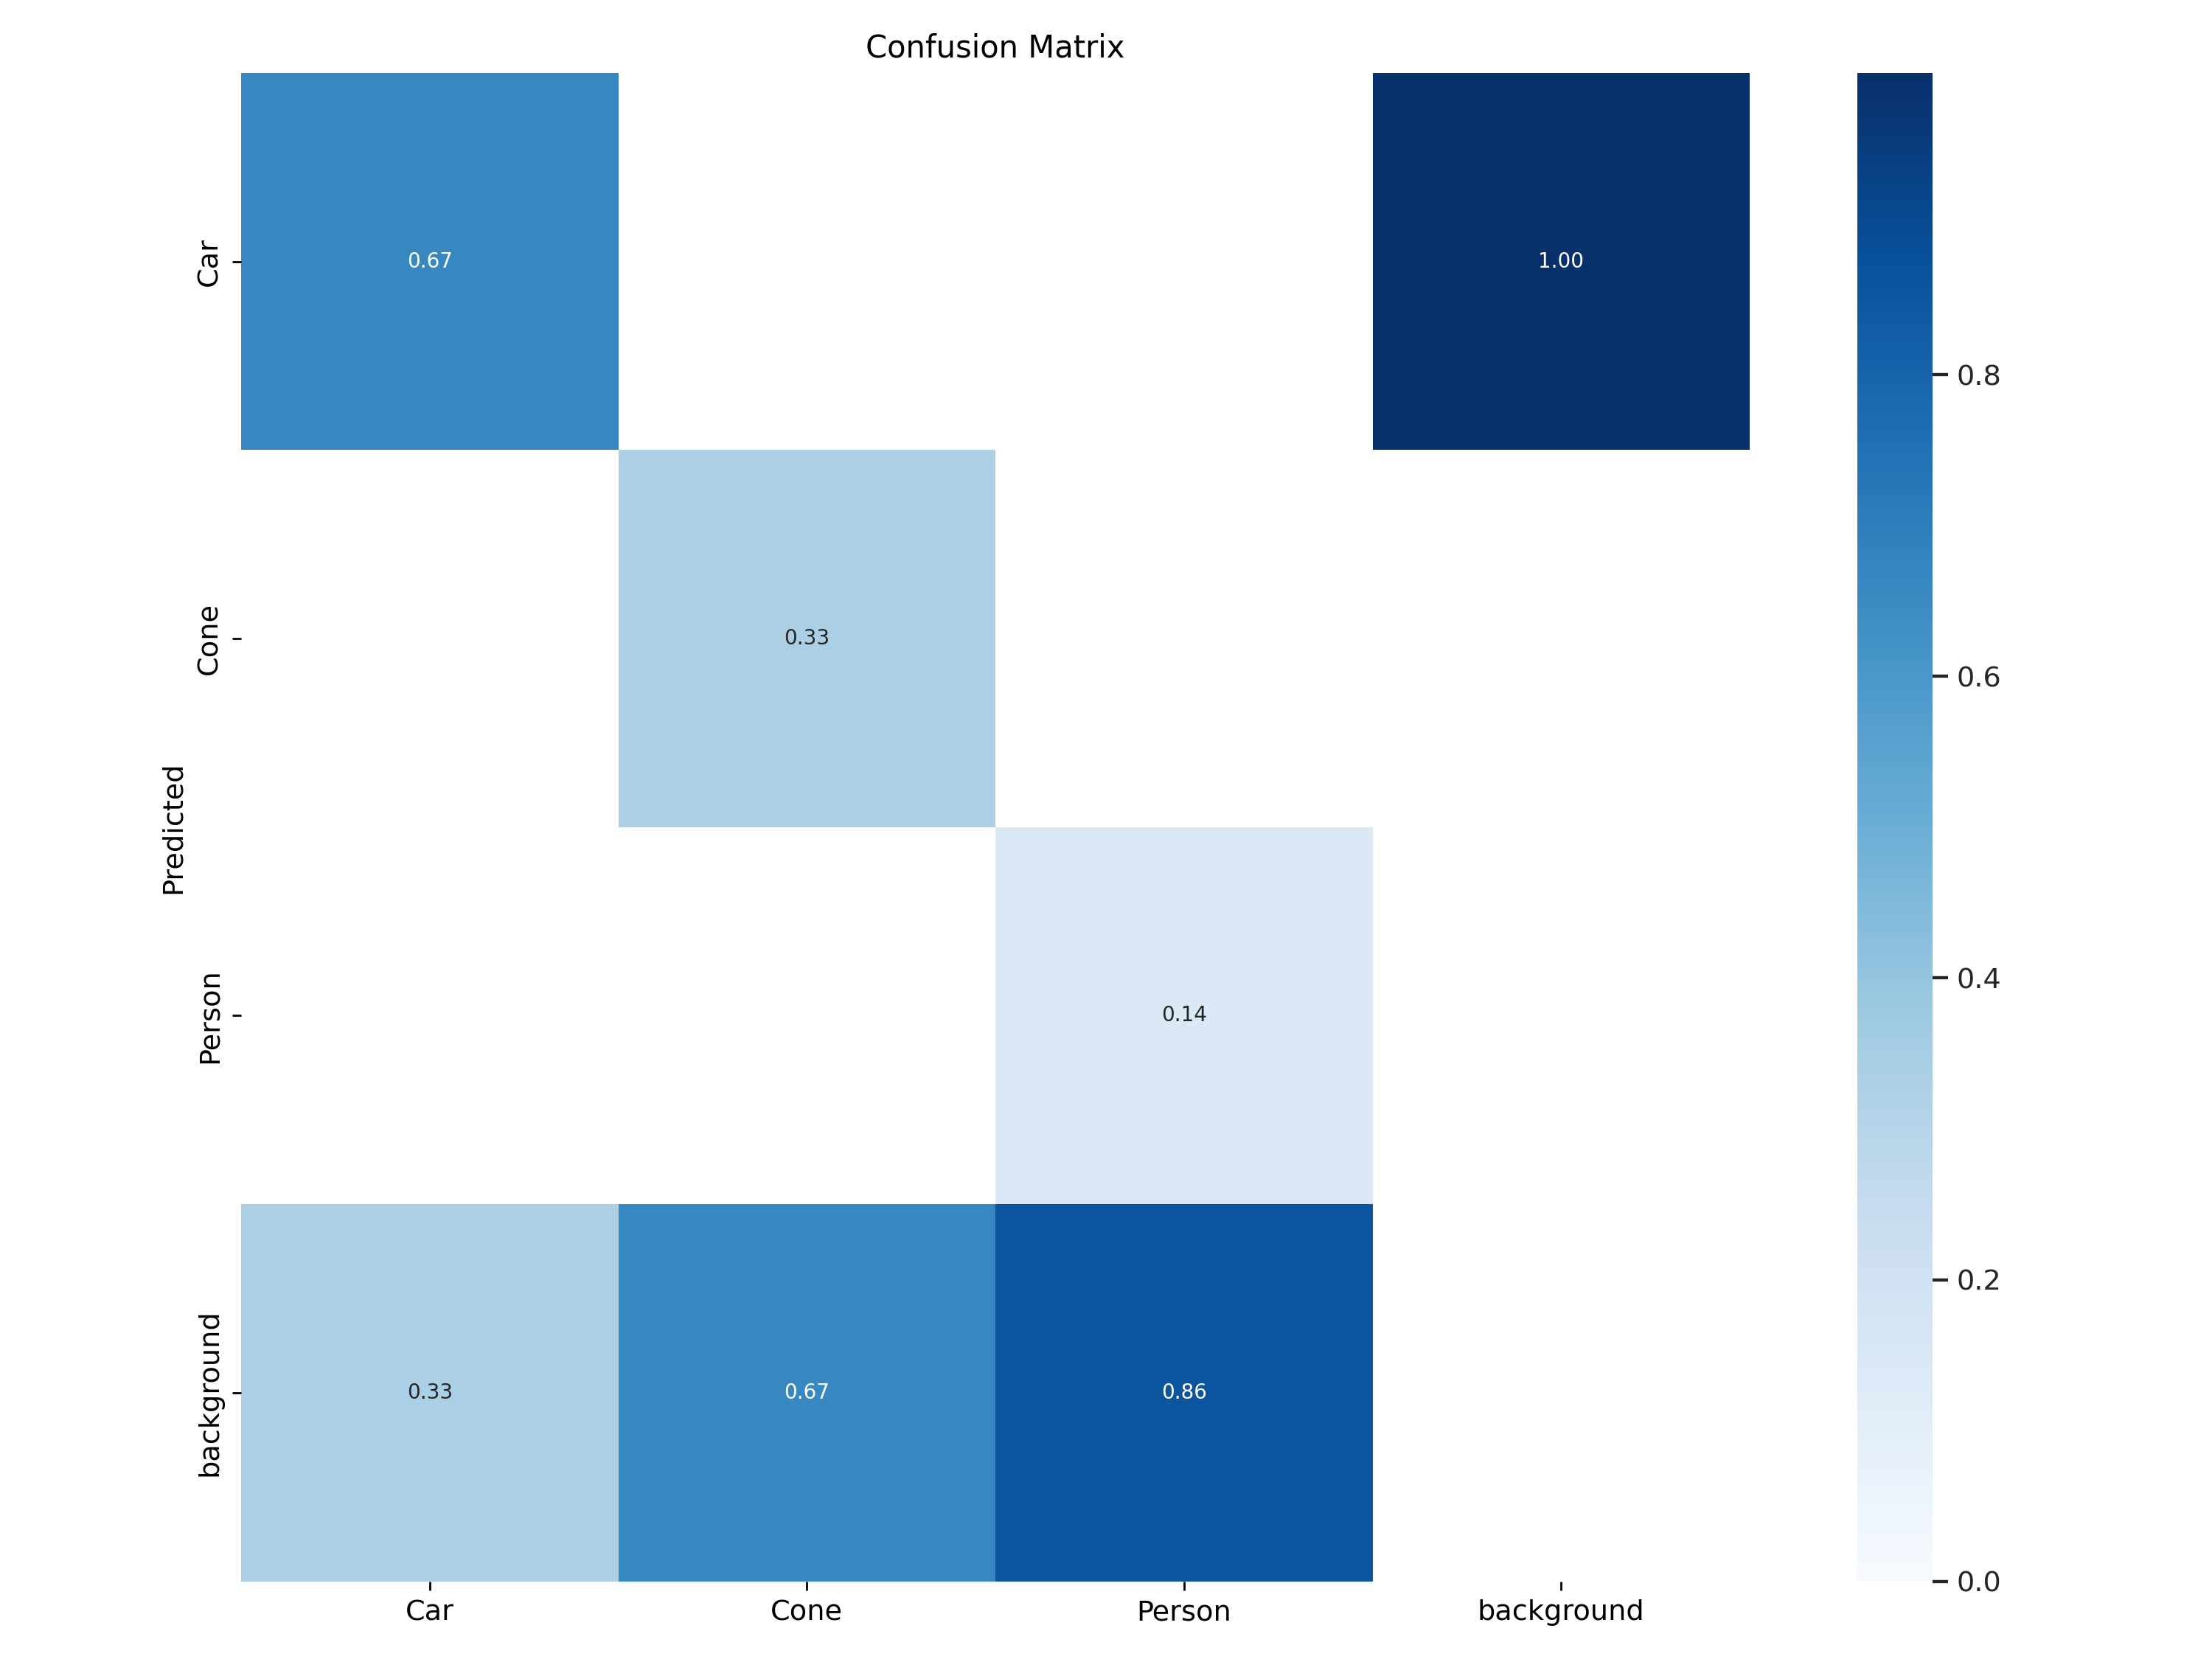

In [ ]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp4/results.png", width=1000)
Image(filename=f"{HOME}/yolov9/runs/train/exp4/confusion_matrix.png", width=1000)

In [ ]:
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt

val: data=/content/yolov9/PlantDoc-2/data.yaml, weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be

In [ ]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp4/weights/best.pt \
--source {dataset.location}/test/images

detect: weights=['/content/yolov9/runs/train/exp4/weights/best.pt'], source=/content/yolov9/PlantDoc-2/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release

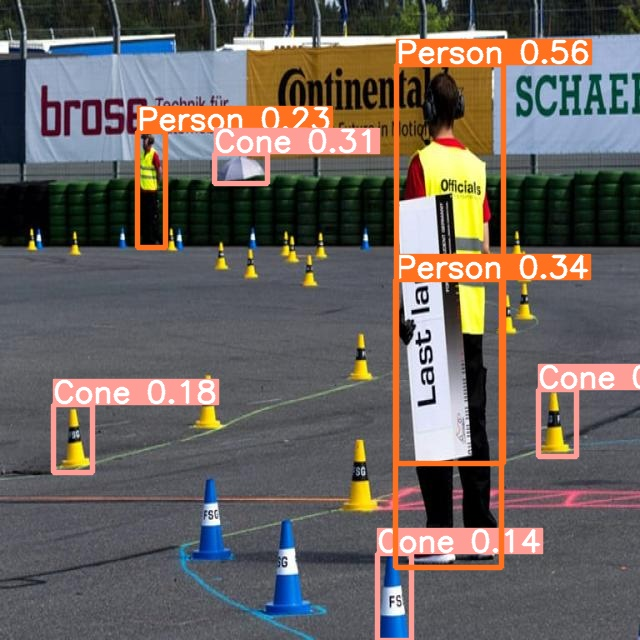

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:5]:
    display(Image(filename=image_path, width=600))

In [ ]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp4")

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/joseph-nelson/plantdoc/2/uploadModel?api_key=YStY4qFjV3tfpnhQcViO&modelType=yolov9&nocache=true
